In [1]:
import torch
import torchvision
import numpy as np
from torch.autograd import Variable
from torchvision import transforms

In [36]:
gDevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
gDevice

device(type='cuda')

-----------

In [58]:
a = np.array([[1,2,3], [4,5,6]], dtype=float).reshape(-1, 3)
b = np.array([2,2]).reshape(-1, 2)
c = np.sum(a, 1)
for i in range(a.shape[0]):
    factor = np.sum(a[i,:])
    print(factor, a[i,:])
    for j in range(a.shape[1]):
        a[i][j] /= factor
a
np.sum(a, 1)

6.0 [1. 2. 3.]
15.0 [4. 5. 6.]


array([1., 1.])

In [52]:
from trainer import BlahutArimoto
r = np.random.rand(1, 5)
r = r / np.sum(r)
pxc = np.array([i+1 for i in range(35)]).reshape(5, -1)
pxc = pxc / np.sum(pxc, 0)
ba = BlahutArimoto(r, pxc)
np.matmul(ba.input_dist, ba.transition)
ba.Update(1e-3)

array([[0.17948893, 0.18867286, 0.19916946, 0.21038595, 0.2222828 ]])

In [53]:
a = np.array([1,2,3]).reshape(-1, 3)
b = np.array(np.arange(12)).reshape(3, 4)
c = np.asarray([a*b[:, i] for i in range(b.shape[1])])
c.squeeze()

array([[ 0,  8, 24],
       [ 1, 10, 27],
       [ 2, 12, 30],
       [ 3, 14, 33]])

In [13]:
m = torch.nn.Softmax(dim=0)
input = torch.randn(2, 3)
output = m(input)
print(torch.sum(output, dim=0))
output

tensor([1.0000, 1.0000, 1.0000])


tensor([[0.0436, 0.5056, 0.9316],
        [0.9564, 0.4944, 0.0684]])

In [15]:
t = torch.FloatTensor([[1,2], [3, 4]])
v = Variable(t)
print(t)
print(v)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])


In [16]:
torch.__version__

'1.2.0'

--------------------

In [21]:
x = torch.tensor(3.0)
y = torch.tensor(9.0, requires_grad=True)
z = x * y
print(x.requires_grad, y.requires_grad, z.requires_grad)

False True True


In [22]:
z.backward()

In [25]:
print(x.grad, y.grad)

None tensor(3.)


In [26]:
x = torch.tensor(3.0)
y = torch.tensor(9.0)
z = x * y
print(x.requires_grad, y.requires_grad, z.requires_grad)

False False False


In [27]:
z.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

----------------

In [35]:
x = torch.FloatTensor(2, 3)
y = torch.FloatTensor(2, 3)
z = x + y
print(x.requires_grad, y.requires_grad, z.requires_grad)

False False False


In [36]:
z.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [47]:
x = torch.FloatTensor(1, 3)
y = torch.FloatTensor(3, 1)
x.copy_(torch.Tensor([1,2,3]).reshape(1, 3))
y.copy_(torch.Tensor([3,2,1]).reshape(3, 1))
x = x.cuda()
y = y.cuda()

#for i in [x, y]:
#    i.requires_grad = True
#    i = i.cuda()
    
z = torch.matmul(x, y)
print(x.requires_grad, y.requires_grad, z.requires_grad)

False False False


In [48]:
x.device

device(type='cuda', index=0)

In [87]:
z.backward()

In [88]:
print(x)

tensor([[0., 0., 0.]], device='cuda:0', requires_grad=True)


In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [43]:
a = torch.Tensor([[1,2], [3,4]]).to(device)
a

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

--------------------

In [46]:
prob = np.array([1]).repeat(10)
prob = prob / np.sum(prob)
prob

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [49]:
fix_noise = torch.Tensor(4, 9).uniform_(-1, 1)
torch.sum(fix_noise, 0)

tensor([ 0.7561, -0.6353, -0.9810,  0.6177, -0.4096,  0.6287, -0.9262, -1.5623,
         0.4151])

In [3]:
for i in range(3):
    scopedvar = 4
print(scopedvar * 5)

20


In [20]:
cat_prob = np.random.rand(10)
cat_prob = cat_prob / np.sum(cat_prob)
cat_prob

array([0.17232439, 0.16382443, 0.11523406, 0.11970304, 0.00879328,
       0.11488785, 0.00523764, 0.10539708, 0.01461249, 0.17998574])

-------------

In [38]:
a = torch.randn(1,2,3,4)
a.size()

torch.Size([1, 2, 3, 4])

In [39]:
b = a.transpose(1, 2)
b.size()

torch.Size([1, 3, 2, 4])

In [40]:
c = a.view(1,3,2,4)
c.size()

torch.Size([1, 3, 2, 4])

In [41]:
print(a, b, c)

tensor([[[[ 0.3998, -2.2906,  0.4069,  0.6118],
          [-0.3872, -0.7257, -0.8900, -0.8064],
          [ 1.1872, -0.6507, -0.8089, -0.3178]],

         [[-1.4208, -2.0442,  0.5316,  0.3203],
          [ 1.6414, -0.2458,  0.3597,  1.8031],
          [ 0.2636, -2.5598, -0.6178, -0.0852]]]]) tensor([[[[ 0.3998, -2.2906,  0.4069,  0.6118],
          [-1.4208, -2.0442,  0.5316,  0.3203]],

         [[-0.3872, -0.7257, -0.8900, -0.8064],
          [ 1.6414, -0.2458,  0.3597,  1.8031]],

         [[ 1.1872, -0.6507, -0.8089, -0.3178],
          [ 0.2636, -2.5598, -0.6178, -0.0852]]]]) tensor([[[[ 0.3998, -2.2906,  0.4069,  0.6118],
          [-0.3872, -0.7257, -0.8900, -0.8064]],

         [[ 1.1872, -0.6507, -0.8089, -0.3178],
          [-1.4208, -2.0442,  0.5316,  0.3203]],

         [[ 1.6414, -0.2458,  0.3597,  1.8031],
          [ 0.2636, -2.5598, -0.6178, -0.0852]]]])


In [42]:
print(id(a), id(b), id(c))

139868516397776 139865104858496 139864942436424


In [60]:
p = np.array([[1.,2], [3, 4]])
p /= np.sum(p, 1).reshape(2,1)

array([[0.33333333, 0.66666667],
       [0.42857143, 0.57142857]])

----------

In [86]:
t = torch.FloatTensor(100, 5)
t.normal_()
torch.mean(t, 0)

tensor([-0.0777,  0.0300, -0.0766, -0.0813,  0.1303])

In [90]:
c = torch.FloatTensor(2, 3).to(gDevice)
c.uniform_()
c.requires_grad

False

---------

In [168]:
import matplotlib.pyplot as plt
dataset = torchvision.datasets.STL10('../datasets', transform=torchvision.transforms.ToTensor(), download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=True, num_workers=1)

Files already downloaded and verified


torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])


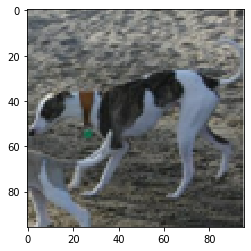

In [169]:
for num_iter, (images, _) in enumerate(dataloader):
    print(images.size())
    if num_iter > 5:
        break
    img = images[0].numpy()
    img = img.transpose(1, 2, 0)
    print(img.shape)
    plt.imshow(img)

------------

In [145]:
from torch.utils.data import WeightedRandomSampler

In [150]:
prob = [1, 1, 1, 9]
data = WeightedRandomSampler(prob, 100, replacement=True)
list(data)

[3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 0,
 3,
 3,
 1,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 0,
 3,
 1,
 0,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 1,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 0]

------------------

Bring Imbalance to MNIST
=====================

In [2]:
import matplotlib.pyplot as plt
import random
import copy

torch.manual_seed(2333)
np.random.seed(2333)

def ShowMnist(arr, nrow=5, ncol=10, figsize=None):
    if figsize is None:
        figsize = (ncol, nrow)
    
    f, a = plt.subplots(nrow, ncol, figsize=figsize)
    
    def _do_show(the_fig, the_arr):
        the_fig.imshow(the_arr)
        the_fig.axis('off')
    
    for i in range(nrow):
        for j in range(ncol):
            _do_show(a[i][j], np.reshape(arr[i*ncol + j], (28, 28)))
    
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.draw()

def DrawDistribution(dataset, title):
    # labels = np.array([])
    # for _, l in dataloader:
    #     labels = np.hstack([labels, l.numpy()])
        
    # print(labels.size)
        
    label, counts = np.unique(dataset.targets, return_counts=True)
    fig, ax = plt.subplots()
    ax.bar(label, counts)
    ax.set_xticks(label)
    plt.title(title)
    plt.show()

sample probs: [0.10740291 0.1813413  0.04912973 0.18792465 0.03889633 0.07857585
 0.05824537 0.14792877 0.08907656 0.06147853]
ib ratio: [0.10633037 0.19518628 0.04665348 0.18694362 0.03742169 0.06989779
 0.05753379 0.15858886 0.0804484  0.06099571]


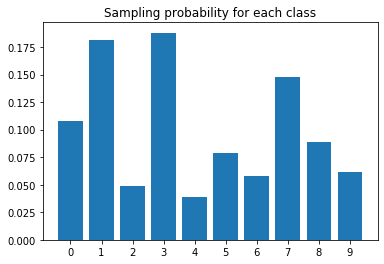

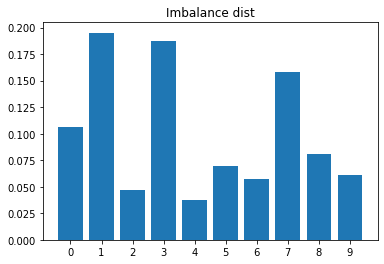

In [3]:
from utils import ImbalanceSampler
dataset = torchvision.datasets.MNIST('../datasets', transform=transforms.ToTensor())
sample_probs = np.random.rand(10)
sample_probs = sample_probs / np.sum(sample_probs)
ib = ImbalanceSampler(dataset, sample_probs)
_, ib_ratio = ib.ImbalancedDataset()
print('sample probs:', sample_probs)
print('ib ratio:', ib_ratio)

labels = np.arange(10)

fig, ax = plt.subplots()
ax.bar(labels, sample_probs)
ax.set_xticks(labels)
plt.title("Sampling probability for each class")
plt.show()

fig, ax = plt.subplots()
ax.bar(labels, ib_ratio)
ax.set_xticks(labels)
plt.title("Imbalance dist")
plt.show()

In [12]:
np.sum(sample_probs)

1.0

In [401]:
sample_probs = np.random.rand(10)
labels = np.arange(10)
dataset = torchvision.datasets.MNIST('../datasets', transform=torchvision.transforms.ToTensor(), download=True)
idx_to_del = [i for i, label in enumerate(dataset.targets)
             if np.random.rand() > sample_probs[label]]
imbalanced_dataset = copy.deepcopy(dataset)
imbalanced_dataset.targets = np.delete(dataset.targets, idx_to_del, axis=0)
imbalanced_dataset.data = np.delete(dataset.data, idx_to_del, axis=0)

In [352]:
loader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=True, num_workers=1)

imbalanced_loader = torch.utils.data.DataLoader(
dataset, batch_size=100, sampler=WeightedRandomSampler(sample_probs, 20000), num_workers=1)

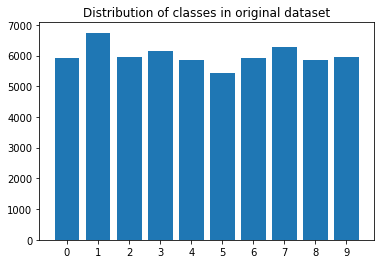

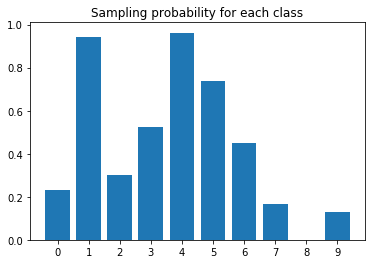

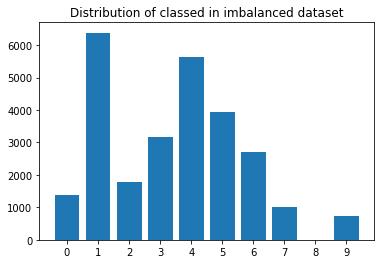

In [402]:
DrawDistribution(dataset, "Distribution of classes in original dataset")
fig, ax = plt.subplots()
ax.bar(labels, sample_probs)
ax.set_xticks(labels)
plt.title("Sampling probability for each class")
plt.show()
DrawDistribution(imbalanced_dataset, "Distribution of classed in imbalanced dataset")

In [373]:
type(imbalanced_dataset)

torchvision.datasets.mnist.MNIST

(array([22., 23., 21., 17., 24., 24., 19., 18., 13., 19.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

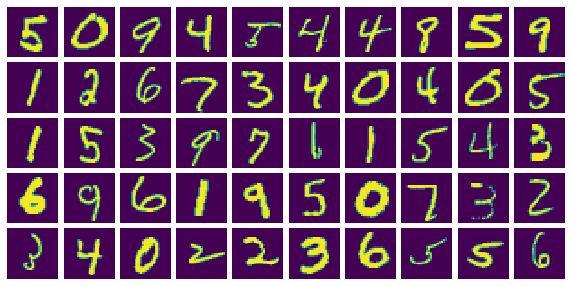

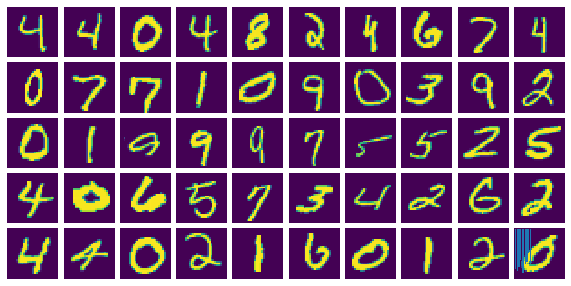

In [294]:
x = np.array([])
for num_iter, (images, _) in enumerate(dataloader):
    if num_iter > 1:
        break
    x = np.hstack([x, _.numpy()])
    ShowMnist(images)
plt.hist(x, bins=10, align='mid', rwidth=0.8)

In [269]:
len(dataloader)

600

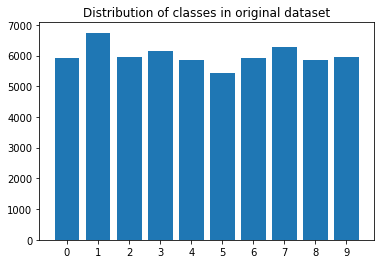

In [295]:
label, counts = np.unique(dataloader.dataset.targets, return_counts=True)
fig, ax = plt.subplots()
ax.bar(label, counts)
ax.set_xticks(label)
plt.title(r"Distribution of classes in original dataset")
plt.show()

In [8]:
a = np.array([1,2,3])
b = np.array([1,-2,0])
np.linalg.norm(a-b)b

5.0

--------------

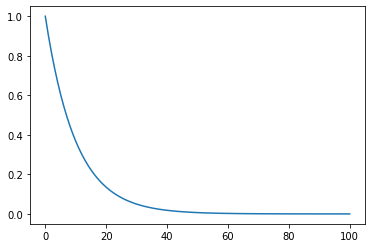

In [17]:
x = np.linspace(0, 100, num=100)
plt.plot(x, np.exp(-x/10))

In [46]:
max(np.exp(-10/4), 1e-8)

0.0820849986238988